In [2]:
print("test")

test


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

print(train.shape, test.shape)

(891, 12) (418, 11)


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Feature Engineering

## (1) NaN Check

- Train의 Cabin 남았음

In [5]:
train.info() #Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull(), "Age_encode"] = train["Age"].mean()
train.loc[train["Age_encode"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_encode


In [7]:
test["Age_encode"] = test["Age"]
test.loc[test["Age"].isnull(), "Age_encode"] = test["Age"].mean()
test.loc[test["Age_encode"].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_encode


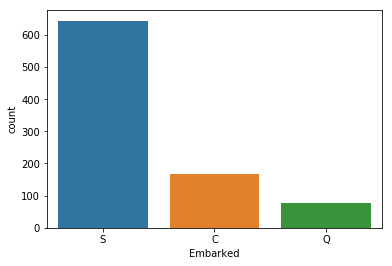

In [8]:
sns.countplot(data = train, x = "Embarked")

In [9]:
test["Embarked_encode"] = test["Embarked"]

train["Embarked_encode"] = train["Embarked"]
train.loc[train["Embarked"].isnull(), "Embarked_encode"] = "S"
train.loc[train["Embarked_encode"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_encode,Embarked_encode


In [10]:
test.info() #Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                332 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               417 non-null float64
Cabin              91 non-null object
Embarked           418 non-null object
Age_encode         418 non-null float64
Embarked_encode    418 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 42.5+ KB


In [11]:
train["Fare_encode"] = train["Fare"]

test["Fare_encode"] = test["Fare"]
test.loc[test["Fare"].isnull(), "Fare_encode"] = test["Fare"].mean()
test.loc[test["Fare_encode"].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_encode,Embarked_encode,Fare_encode


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_encode,Fare_encode
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,512.329200


In [13]:
train.columns

# 처리해야 할 것들 'Name', 'Sex', 'Ticket', 'Age_encode', 'Embarked_encode'

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Age_encode         891 non-null float64
Embarked_encode    891 non-null object
Fare_encode        891 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 104.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-

# (2) Name 구분 - Mr. Mrs. 

In [17]:
train.loc[train["Name"].str.contains("Master"), "Name_encode"] = "Master"
train.loc[train["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
train.loc[train["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
train.loc[train["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
train.loc[train["Name_encode"].isnull(), "Name_encode"] = "Other"

train["Name_encode"].head()

#Mrs, Miss, Master
#sns.countplot(data = train, x = "Name_encode", hue ="Survived")

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name_encode, dtype: object

In [19]:
train[["Name", "Name_encode"]].head()

,Name,Name_encode
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [20]:
test.loc[test["Name"].str.contains("Master"), "Name_encode"] = "Master"
test.loc[test["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
test.loc[test["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
test.loc[test["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
test.loc[test["Name_encode"].isnull(), "Name_encode"] = "Other"

test["Name_encode"].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Name_encode, dtype: object

## (3) One Hot Encoding

In [21]:
obj_df = train.select_dtypes(include = ['object']).copy()
obj_df.head()

obj_df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked_encode',
       'Name_encode'],
      dtype='object')

In [22]:
obj_df["Cabin"].value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F33            3
Name: Cabin, dtype: int64

In [23]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        data = data.drop(column, axis = 1)
    return data

dummy_columns = ["Sex", "Pclass", "Embarked_encode", "Name_encode"]

train_dummy = dummy_data(train, dummy_columns)
test_dummy = dummy_data(test, dummy_columns)

print("train:", train.shape, train_dummy.shape)
print("test:", test.shape, test_dummy.shape)

train: (891, 16) (891, 25)
test: (418, 15) (418, 24)


In [24]:
train_dummy.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Pclass_2,Pclass_3,Embarked_encode_C,Embarked_encode_Q,Embarked_encode_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Name_encode_Other
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,...,0,1,0,0,1,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,1,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,1,0,0,1,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,...,0,0,0,0,1,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,...,0,1,0,0,1,0,0,1,0,0


In [182]:
train = train_dummy
test = test_dummy

# (3) FamilySize구하기

In [183]:
train["familysize"] = train["SibSp"] + train["Parch"]
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Pclass_2,Pclass_3,Embarked_encode_C,Embarked_encode_Q,Embarked_encode_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mrs,Name_encode_Other,familysize
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,...,0,1,0,0,1,0,0,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,1,0,0,0,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,1,0,0,1,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,...,0,0,0,0,1,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,...,0,1,0,0,1,0,0,0,1,0


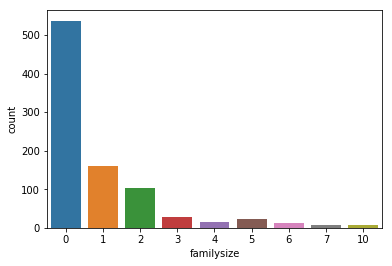

In [184]:
sns.countplot(data = train, x = "familysize")

In [185]:
test["familysize"] = test["SibSp"] + test["Parch"]
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_encode,...,Pclass_2,Pclass_3,Embarked_encode_C,Embarked_encode_Q,Embarked_encode_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mrs,Name_encode_Other,familysize
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,34.5,...,0,1,0,1,0,0,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,47.0,...,0,1,0,0,1,0,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,62.0,...,1,0,0,1,0,0,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,27.0,...,0,1,0,0,1,0,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,22.0,...,0,1,0,0,1,0,0,1,0,2


## (3) Categorization

cate_features = ["Pclass", "Sex_encode", "Embarked_encode2"]

for var in cate_features:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

train.columns

train["Pclass"] = train["Pclass"].astype("int")
test["Pclass"] = test["Pclass"].astype("int")

# Normalize

In [186]:
from sklearn.preprocessing import MinMaxScaler

def normalize_value(data, columns):
    scaler = MinMaxScaler()
    for column in columns:
        data[column] = scaler.fit_transform(data[column].values.reshape(-1,1))    
    return data

normal_columns = ["Age_encode", "Fare_encode", "familysize"]

train_normal = normalize_value(train, normal_columns)
test_normal = normalize_value(test, normal_columns)

print("train:", train.shape, train_normal.shape)
print("test:", test.shape, test_normal.shape)

train: (891, 25) (891, 25)
test: (418, 24) (418, 24)


In [187]:
train[normal_columns].head()

,Age_encode,Fare_encode,familysize
0,0.271174,0.014151,0.1
1,0.472229,0.139136,0.1
2,0.321438,0.015469,0.0
3,0.434531,0.103644,0.1
4,0.434531,0.015713,0.0


In [188]:
train = train_normal
test = test_normal

# XGB Fit

In [189]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_encode', 'Fare_encode', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_encode_C',
       'Embarked_encode_Q', 'Embarked_encode_S', 'Name_encode_Master',
       'Name_encode_Miss', 'Name_encode_Mrs', 'Name_encode_Other',
       'familysize'],
      dtype='object')

In [201]:
feature_names = ['Age_encode',
                 'Fare_encode', 'Sex_female',
                 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                 'Embarked_encode_C', 'Embarked_encode_S', 
                  'Name_encode_Miss',   
                 'Name_encode_Other','familysize']

# 하위 4개 제외
#10	Name_encode_Master	0.005540
#8	Embarked_encode_Q	0.001847
#3	Sex_male	0.000923
#12	Name_encode_Mrs	0.000000

feature_names3 = ['Age_encode',
                 'Fare_encode', 'Sex_female', 'Sex_male',
                 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                 'Embarked_encode_C', 'Embarked_encode_Q', 'Embarked_encode_S', 
                  'Name_encode_Master','Name_encode_Miss', 'Name_encode_Mrs',  
                 'Name_encode_Other','familysize']

#Normalize
#Accuracy == #Kaggle 0.7894

#Name 인코딩, Familysize추가
#{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
#Accuracy == #Kaggle 0.7846

feature_names2 = ['SibSp', 'Parch', 'Fare', 'Age_encode',
                 'Fare_encode', 'Sex_female', 'Sex_male',
                 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                 'Embarked_encode_C', 'Embarked_encode_Q', 'Embarked_encode_S']

#{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
#0.84 #Kaggle 0.7799

#{'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.4, 'colsample_bytree': 0.7}
#0.84 #Kaggle 0.7655

label_name = 'Survived'

In [202]:
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Age_encode           891 non-null float64
Fare_encode          891 non-null float64
Sex_female           891 non-null uint8
Pclass_1             891 non-null uint8
Pclass_2             891 non-null uint8
Pclass_3             891 non-null uint8
Embarked_encode_C    891 non-null uint8
Embarked_encode_S    891 non-null uint8
Name_encode_Miss     891 non-null uint8
Name_encode_Other    891 non-null uint8
familysize           891 non-null float64
dtypes: float64(3), uint8(8)
memory usage: 27.9 KB


# RamdomSearch / Score

In [234]:
from xgboost import XGBClassifier as xgb
import xgboost as xgb_basic
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

xgb()
#from sklearn.model_selection import cross_val_predict

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

- http://danielhnyk.cz/how-to-use-xgboost-in-python/

In [281]:
one_to_left = st.beta(10, 1)
from_zero_positive = st.expon(0, 50)

params = {
    "n_estimators" : st.randint(400, 2000),
    "max_depth": st.randint(6, 50),
    "learning_rate": st.uniform(0.1, 0.9),
    "colsample_bytree": [0.98], #one_to_left,
    "subsample": [0.93], #one_to_left,
    "reg_alpha": [1.64], #from_zero_positive,
    "min_child_weight": [7.75], #from_zero_positive,
}

xgbcla = xgb(nthreads = -1)

In [282]:
RandomizedSearchCV

sklearn.model_selection._search.RandomizedSearchCV

In [283]:
gs = RandomizedSearchCV(xgbcla, params, cv = 5, n_iter=50) 
# 기본값 cv없음, n_iter = 10
%time gs.fit(X_train, y_train)
print(gs.best_params_)
score = round(gs.best_score_, 4)
print(score)

Wall time: 3min 34s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CF59DA0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CF59E48>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CF1C9E8>, 'colsample_bytree': [0.98], 'subsample': [0.93], 'reg_alpha': [1.64], 'min_child_weight': [7.75]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
    

In [284]:
print(gs.best_params_)
score = round(gs.best_score_, 4)
print(score)

{'colsample_bytree': 0.98, 'learning_rate': 0.36695732680352366, 'max_depth': 48, 'min_child_weight': 7.75, 'n_estimators': 735, 'reg_alpha': 1.64, 'subsample': 0.93}
0.8451


# Model 결정

In [294]:
xgb()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [303]:
xgb_model = xgb(max_depth = 6, 
                n_estimators = 100, 
                learning_rate = 0.01,
                colsample_bytree = 0.9,
                random_state = 79)

# 0.7990

xgb_model3 = xgb(n_estimators = 4000, 
                random_state = 79)

# Kaggle 0.7368




xgb_model2 = xgb(max_depth = 48, 
                n_estimators = 735, 
                learning_rate = 0.36,
                colsample_bytree = 0.98,
                sub_sample = 0.93,
                min_child_weight = 7.75,
                random_state = 79)

#{'colsample_bytree': 0.98, 'learning_rate': 0.36695732680352366, 'max_depth': 48, 'min_child_weight': 7.75, 'n_estimators': 735, 'reg_alpha': 1.64, 'subsample': 0.93}
#Best Score: 0.8451
#CV Score:  0.8172
#Kaggle: 0.7368

xgb_model1 = xgb(max_depth = 2, 
                n_estimators = 30, 
                learning_rate = 0.9,
                colsample_bytree = 0.9,
                subsample = 0.9,
                random_state = 79)
# 0.7464

xgb_model



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

- https://github.com/corazzon/KaggleStruggle/blob/master/titanic/titanic-xgb.ipynb

# 이걸로는 제대로 찾아지지 않음

import warnings
warnings.filterwarnings('ignore')

gbm_params_grid = {
#    'n_estimators': range(10, 100),
    'n_estimators': np.arange(0, 100, 10), # ()괄호를 써야 함. random은 []괄호
    'max_depth': np.arange(0, 10, 2),
    'learning_rate': np.arange(0, 1, 0.1),
    'colsample_bytree': [.9],
    'subsample': [0.9, 1]
}

gbm = xgb()

xgb_random = RandomizedSearchCV(param_distributions = gbm_params_grid, estimator = gbm,
                                scoring = "accuracy", verbose = 1, n_iter = 50, cv = 20)

%time xgb_random.fit(X_train, y_train)

print(xgb_random.best_params_)
score = round(xgb_random.best_score_, 4)
print(score)

In [304]:
%time xgb_model.fit(X_train, y_train)

Wall time: 144 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [305]:
score_basic = xgb_model.score(X_train, y_train)
score_basic = round(score_basic, 4)
score_basic

0.8754

In [306]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

%time score = cross_val_score(xgb_model, X_train, y_train, cv = 20).mean()
print(f"CV Score: {score: .4f}")

Wall time: 2.52 s
CV Score:  0.8352


# Feature Importance

In [307]:
print(list(zip(feature_names, xgb_model.feature_importances_)))
feature_df = list(zip(feature_names, xgb_model.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

TypeError: 'numpy.ndarray' object is not callable

# Predict & Submission

In [308]:
predictions = xgb_model.predict(X_test)

In [309]:
submission = pd.read_csv("data/titanic/gender_submission.csv")
submission["Survived"] = predictions

print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [310]:
submission.to_csv(f"data/titanic/submission_titanic_XGB_{score:.4f}.csv", index=False)

# sklearn의 labelEncoder 사용해본 예제

- https://www.kaggle.com/cbrogan/xgboost-example-python

In [66]:
from sklearn.preprocessing import LabelEncoder

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
feature_names = ['Pclass','Sex','Embarked_encode', 'Age_encode','Fare_encode','Parch']
nonnumeric_columns = ['Sex', 'Embarked_encode']

# Join the features from train and test together before imputing missing values,
# in case their distribution is slightly different

big_X = train[feature_names].append(test[feature_names])
big_X_imputed = DataFrameImputer().fit_transform(big_X)

le = LabelEncoder()
for feature in nonnumeric_columns:
    big_X_imputed[feature] = le.fit_transform(big_X_imputed[feature])

big_X_imputed[feature].shape

(1309,)

In [80]:
train_X = big_X_imputed[0:train.shape[0]].as_matrix()
test_X = big_X_imputed[train.shape[0]::].as_matrix()
train_y = train['Survived']

train_X = pd.DataFrame(train_X)
train_X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,1,2,3,4,5
0,3.0,1.0,2.0,22.0,7.2500,0.0
1,1.0,0.0,0.0,38.0,71.2833,0.0
2,3.0,0.0,2.0,26.0,7.9250,0.0
3,1.0,0.0,2.0,35.0,53.1000,0.0
4,3.0,1.0,2.0,35.0,8.0500,0.0


In [81]:
test_X = pd.DataFrame(test_X)
test_X.head()

,0,1,2,3,4,5
0,3.0,1.0,1.0,34.5,7.8292,0.0
1,3.0,0.0,2.0,47.0,7.0000,0.0
2,2.0,1.0,1.0,62.0,9.6875,0.0
3,3.0,1.0,2.0,27.0,8.6625,0.0
4,3.0,0.0,2.0,22.0,12.2875,1.0


In [ ]:
import xgboost as xgb

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth=8, n_estimators=4000, learning_rate=0.05).fit(train_X, train_y)
predictions = gbm.predict(test_X)

In [74]:
# Kaggle needs the submission to have a certain format;
# see https://www.kaggle.com/c/titanic-gettingStarted/download/gendermodel.csv
# for an example of what it's supposed to look like.
submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                            'Survived': predictions })

In [75]:
submission.to_csv("data/titanic/submission_titanic_XGB.csv", index=False)